In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking for presence of any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Dropping dteday since I believe that the amount of information with respect to years, months, workingday, weekday and Holiday Give us the dteday might not be relevant.
df=df.drop('dteday',axis=1)

In [7]:
#Dropping instant since it doesn't add any extra details to our system its just a serial number.
df=df.drop('instant',axis=1)

In [8]:
#building a list of categorical variables.
catvar=['season','yr','mnth','holiday','weekday','workingday','weathersit']

#Here yr,holiday,workingday are binary variables
dummycatvar=['season','weathersit','mnth','weekday']

In [9]:
#list of numerical columns
numvar=['temp','atemp','hum','windspeed','casual','registered']

In [88]:
numvar1=['temp','atemp','hum','windspeed','cnt']

In [10]:
#creating a target variable
target=['cnt']

## Univariate Analysis

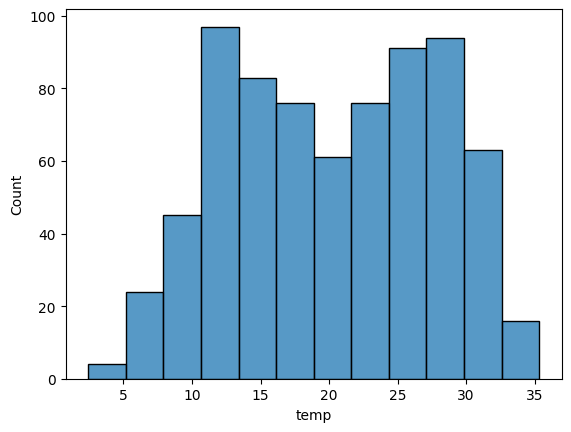

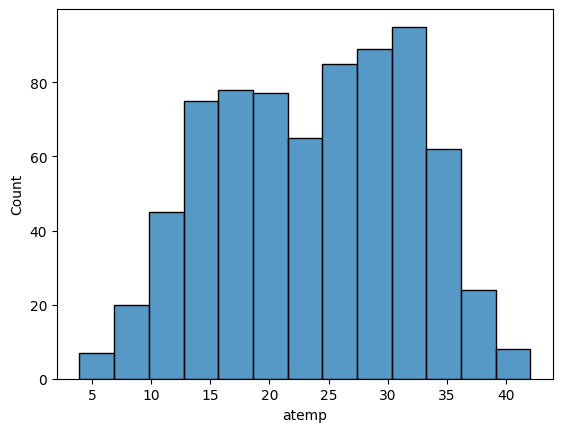

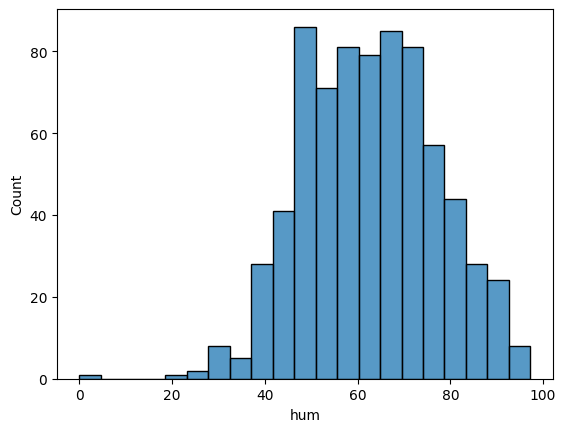

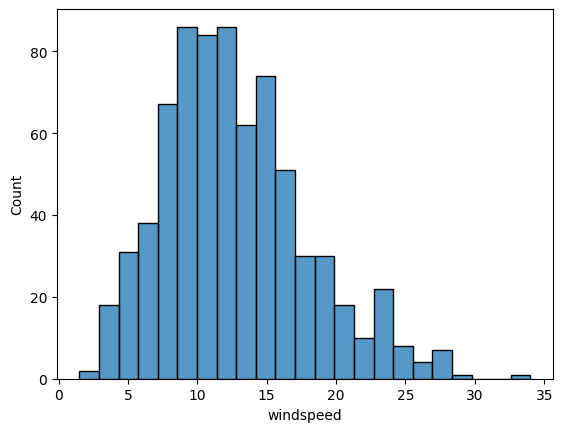

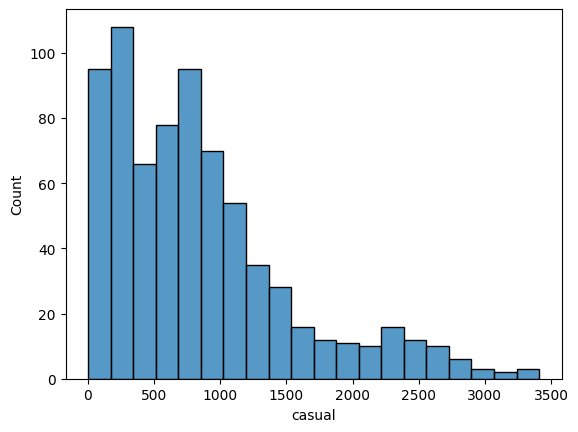

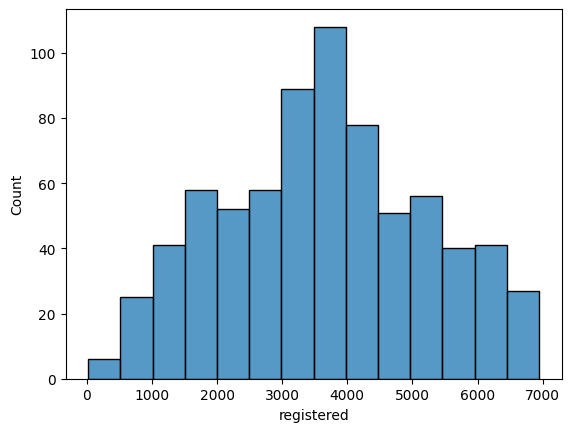

In [11]:
for i in numvar:
    sns.histplot(x=df[i])
    plt.show()

## Bivariate Analysis

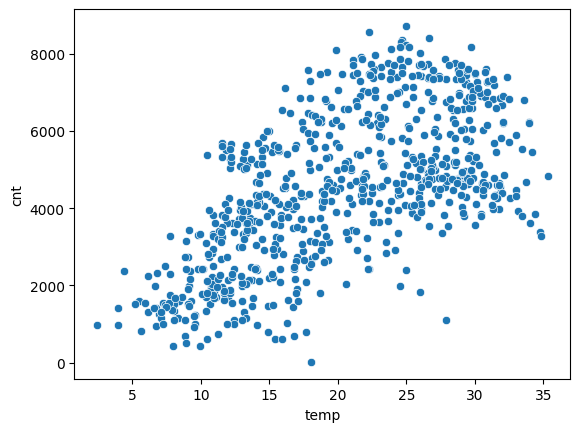

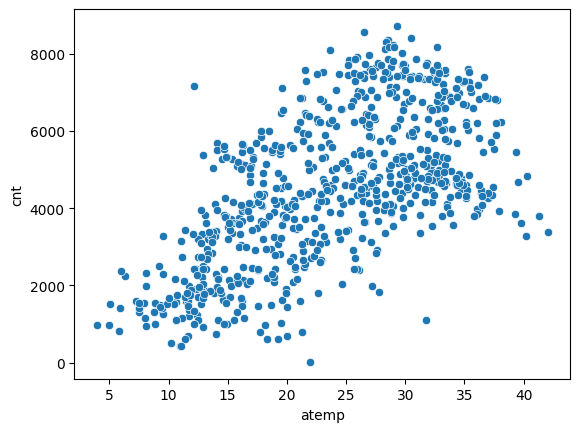

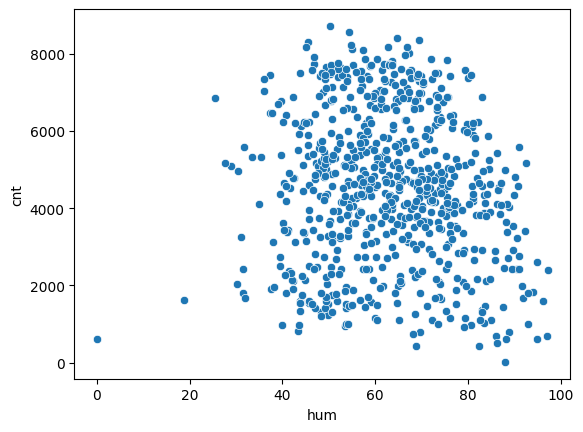

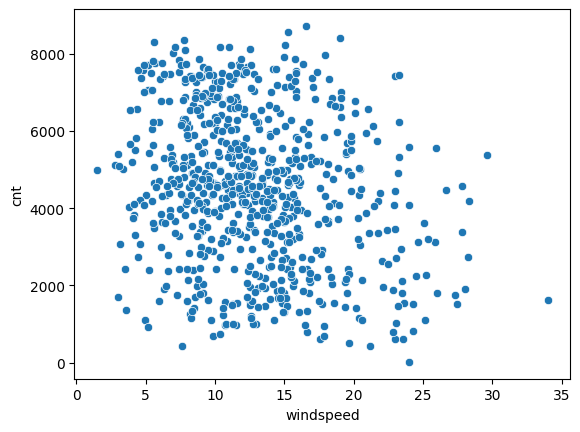

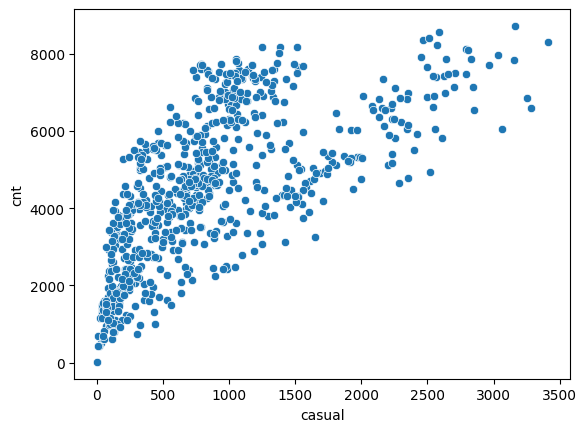

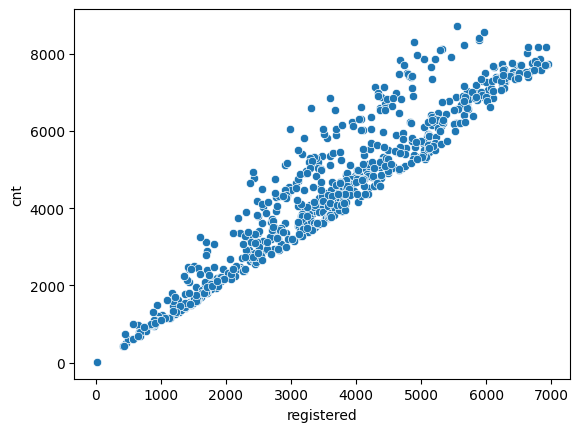

In [12]:
for i in numvar:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

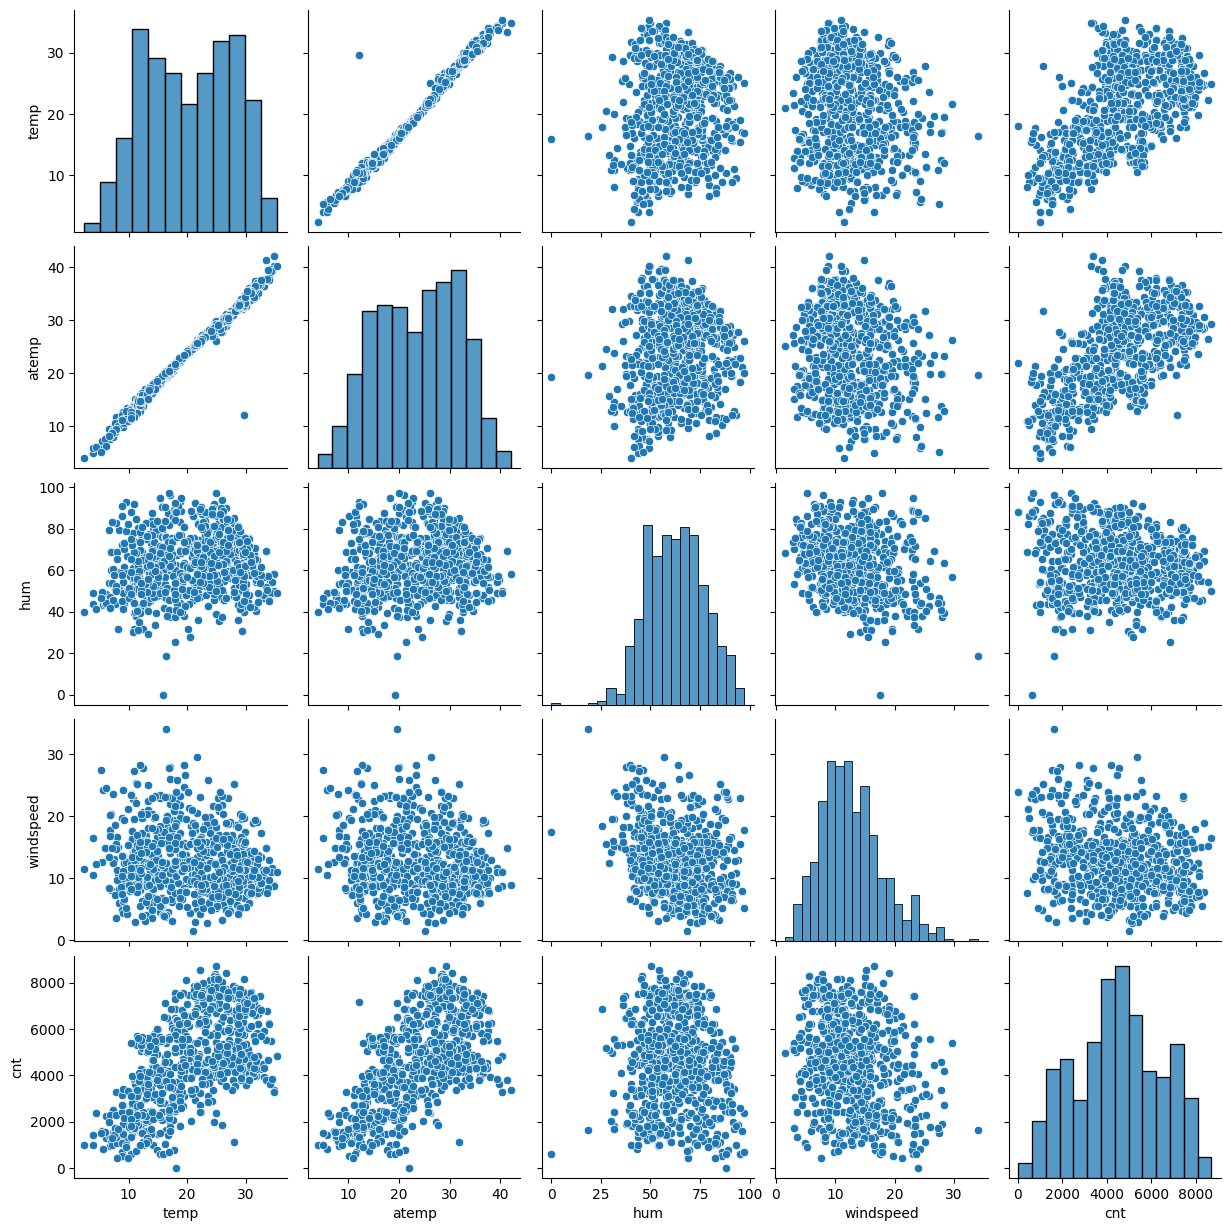

In [89]:
sns.pairplot(df[numvar1])
plt.show()

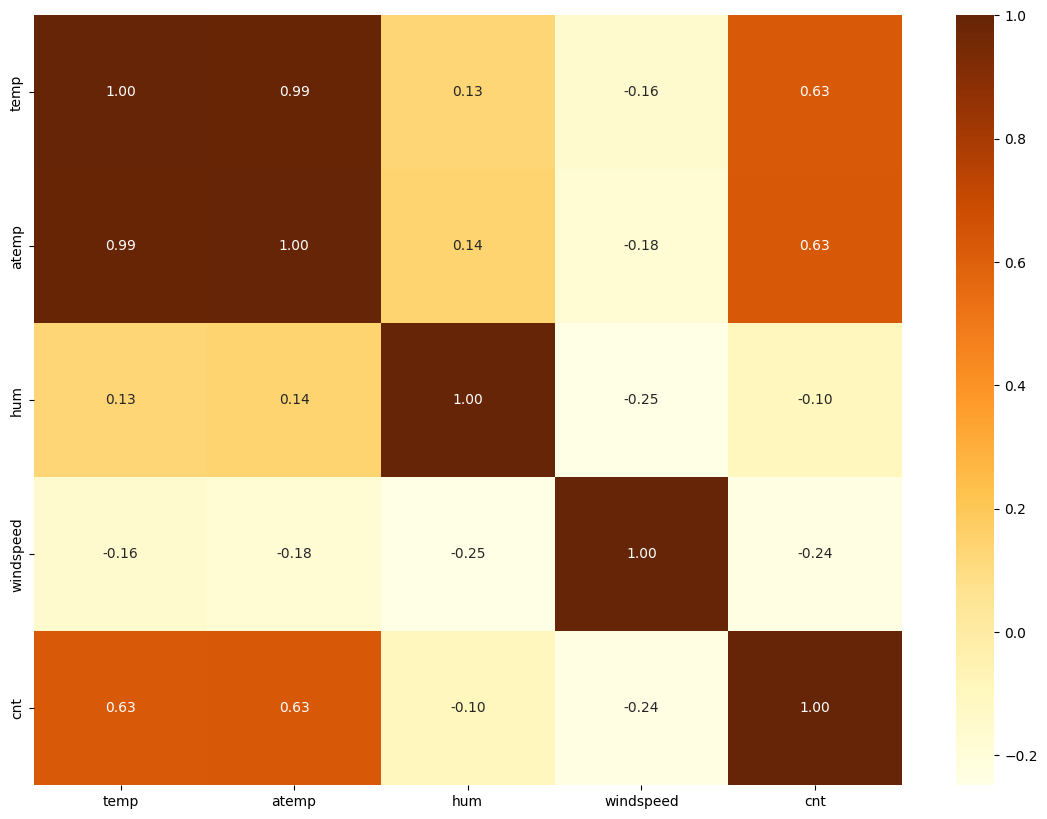

In [90]:
#sns.pairplot(df[numvar1],y_vars=df['cnt'])
plt.figure(figsize=(14, 10))
sns.heatmap(df[numvar1].corr(), annot= True, fmt= ".2f",cmap="YlOrBr")
plt.show()

## Converting datatype to string for better readbility and dummy values creation

In [13]:
df["season"]=df["season"].astype("string")

In [14]:
df['season'] = df['season'].apply(lambda x: "spring" if x == '1' else x)

In [15]:
df['season'] = df['season'].apply(lambda x: "summer" if x == '2' else x)

In [16]:
df['season'] = df['season'].apply(lambda x: "fall" if x == '3' else x)

In [17]:
df['season'] = df['season'].apply(lambda x: "spring" if x == '4' else x)

In [18]:
df['mnth']=df['mnth'].astype("string")

In [19]:
df['mnth'] = df['mnth'].apply(lambda x: "Jan" if x == '1' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Feb" if x == '2' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Mar" if x == '3' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Apr" if x == '4' else x)
df['mnth'] = df['mnth'].apply(lambda x: "May" if x == '5' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Jun" if x == '6' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Jul" if x == '7' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Aug" if x == '8' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Sep" if x == '9' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Oct" if x == '10' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Nov" if x == '11' else x)
df['mnth'] = df['mnth'].apply(lambda x: "Dec" if x == '12' else x)

In [20]:
df['weekday']=df['weekday'].astype("string")

In [21]:
df['weekday'] = df['weekday'].apply(lambda x: "Mon" if x == '0' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Tue" if x == '1' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Wed" if x == '2' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Thu" if x == '3' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Fri" if x == '4' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Sat" if x == '5' else x)
df['weekday'] = df['weekday'].apply(lambda x: "Sun" if x == '6' else x)

In [22]:
df['yr']=df['yr'].astype("string")

In [23]:
df['yr'] = df['yr'].apply(lambda x: "2018" if x == '0' else x)
df['yr'] = df['yr'].apply(lambda x: "2019" if x == '1' else x)

In [24]:
df['workingday']=df['workingday'].astype("string")

In [25]:
df['workingday'] = df['workingday'].apply(lambda x: "Non Working day" if x == '0' else x)
df['workingday'] = df['workingday'].apply(lambda x: "Working day" if x == '1' else x)

In [26]:
df['weathersit']=df['weathersit'].astype("string")

In [27]:
df['weathersit'] = df['weathersit'].apply(lambda x: "weathersit_1" if x == '1' else x)
df['weathersit'] = df['weathersit'].apply(lambda x: "weathersit_2" if x == '2' else x)
df['weathersit'] = df['weathersit'].apply(lambda x: "weathersit_3" if x == '3' else x)
df['weathersit'] = df['weathersit'].apply(lambda x: "weathersit_4" if x == '4' else x)

In [28]:
df.head(25)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sun,Non Working day,weathersit_2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Mon,Non Working day,weathersit_2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Tue,Working day,weathersit_1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Wed,Working day,weathersit_1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Thu,Working day,weathersit_1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,spring,2018,Jan,0,Fri,Working day,weathersit_1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,spring,2018,Jan,0,Sat,Working day,weathersit_2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,spring,2018,Jan,0,Sun,Non Working day,weathersit_2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,spring,2018,Jan,0,Mon,Non Working day,weathersit_1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,spring,2018,Jan,0,Tue,Working day,weathersit_1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


## Univariate Analysis

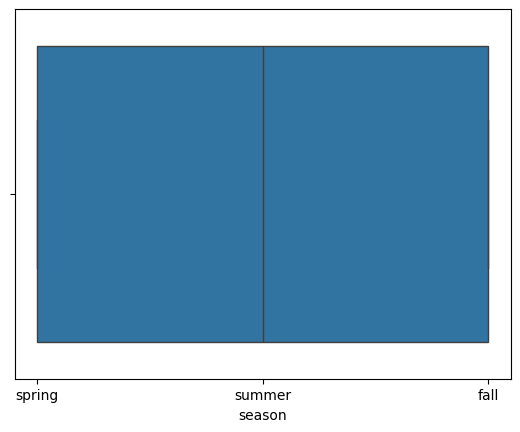

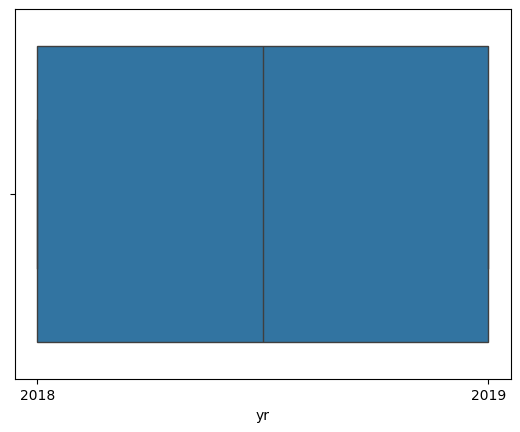

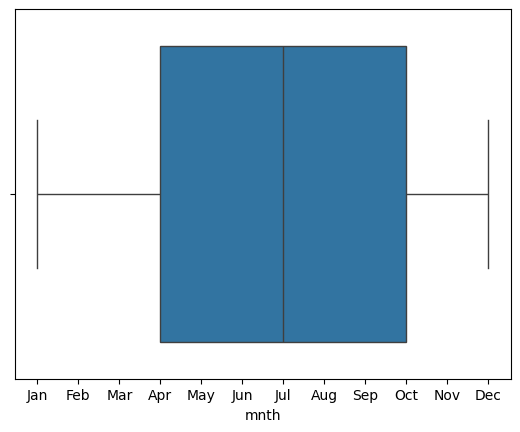

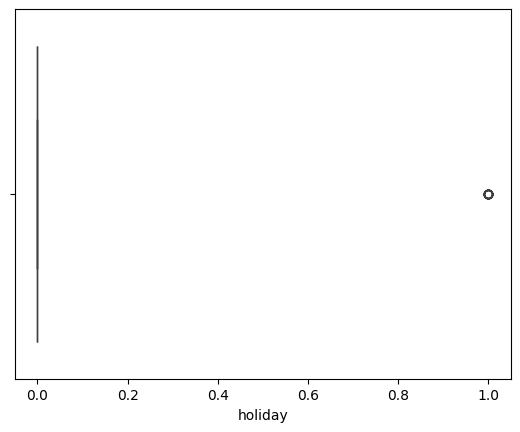

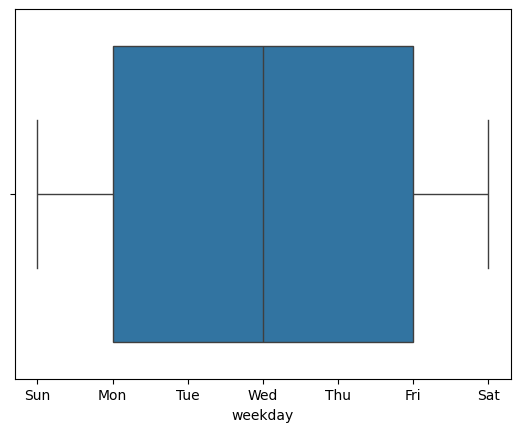

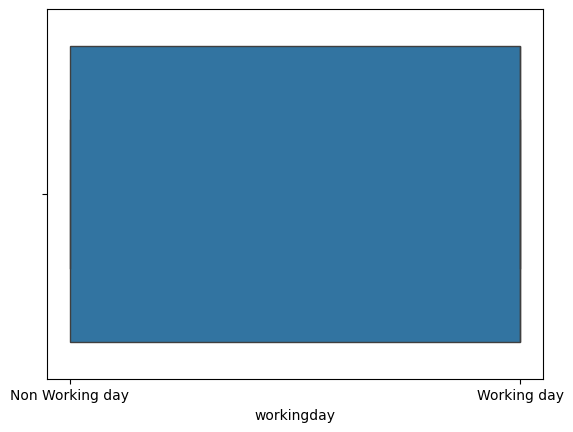

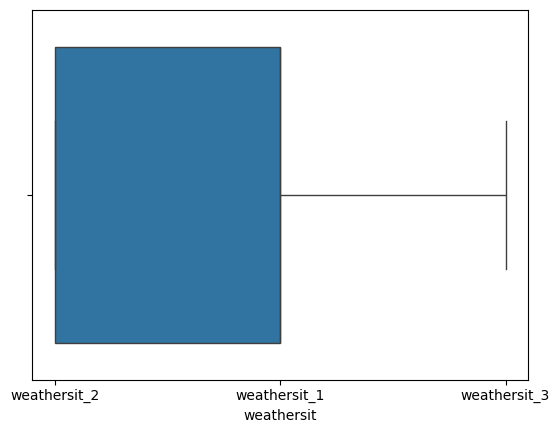

In [29]:
for i in catvar:
    sns.boxplot(x=df[i])
    plt.show()

## Bivariate Analysis Categorical

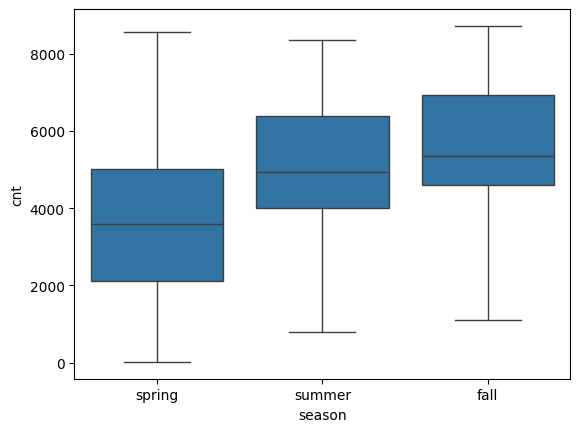

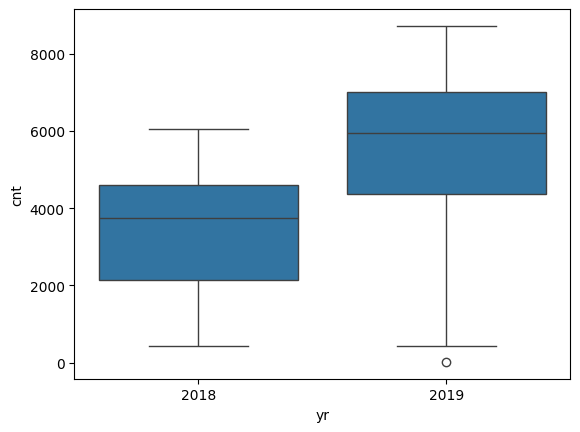

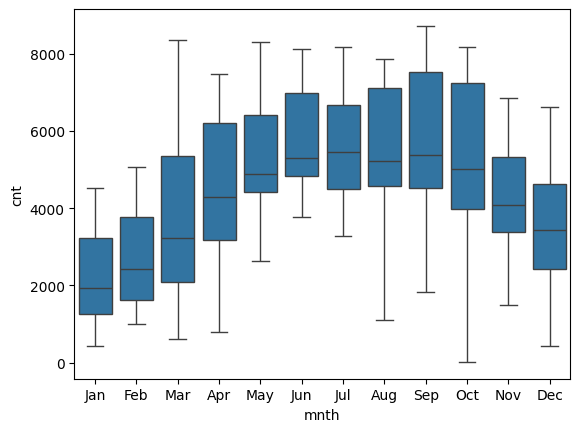

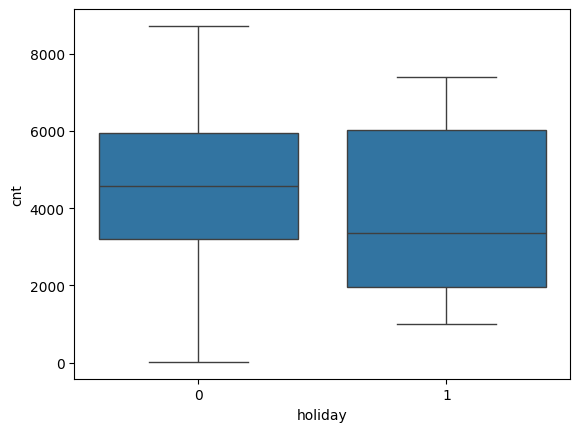

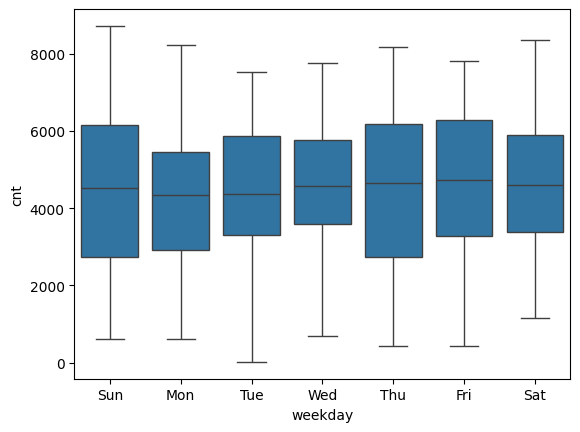

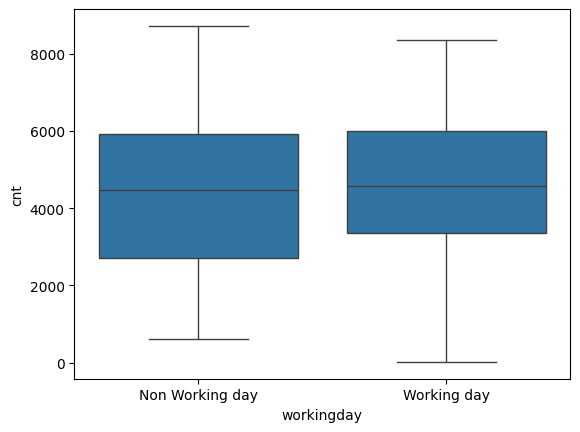

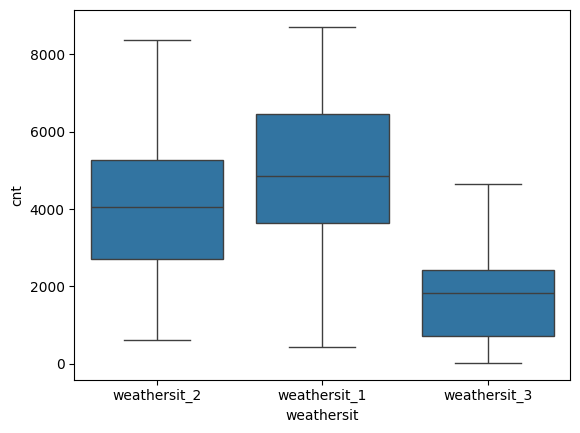

In [30]:
for i in catvar:
    sns.boxplot(x=df[i],y=df['cnt'])
    plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 80.0+ KB


In [32]:
df[catvar].nunique()

season         3
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [33]:
dum=pd.get_dummies(df["season"],drop_first=True,dtype=int)
dum.head()

,spring,summer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
df=pd.concat([df,dum],axis=1)

In [35]:
dum=pd.get_dummies(df["mnth"],drop_first=True,dtype=int)
dum.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
df=pd.concat([df,dum],axis=1)

In [37]:
df.shape

(730, 27)

In [38]:
dum=pd.get_dummies(df["weekday"],drop_first=True,dtype=int)
dum.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [39]:
df=pd.concat([df,dum],axis=1)

In [40]:
df.shape

(730, 33)

In [41]:
dum=pd.get_dummies(df["weathersit"],drop_first=True,dtype=int)
dum.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [42]:
df=pd.concat([df,dum],axis=1)

In [43]:
df.shape

(730, 35)

In [44]:
dum=pd.get_dummies(df["yr"],drop_first=True,dtype=int)
dum.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [45]:
df=pd.concat([df,dum],axis=1)

In [46]:
dum=pd.get_dummies(df["workingday"],drop_first=True,dtype=int)
dum.head()

,Working day
0,0
1,0
2,1
3,1
4,1


In [47]:
df=pd.concat([df,dum],axis=1)

In [48]:
df.shape

(730, 37)

In [49]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3,2019,Working day
0,spring,2018,Jan,0,Sun,Non Working day,weathersit_2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,1,0,0,0
1,spring,2018,Jan,0,Mon,Non Working day,weathersit_2,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,1,0,0,0
2,spring,2018,Jan,0,Tue,Working day,weathersit_1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,1
3,spring,2018,Jan,0,Wed,Working day,weathersit_1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,1
4,spring,2018,Jan,0,Thu,Working day,weathersit_1,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,0,0,1


In [50]:
df=df.drop(['workingday','yr','mnth','season','weathersit','weekday'],axis=1)

In [51]:
df.shape

(730, 31)

In [52]:
df.columns

Index(['holiday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'spring', 'summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'weathersit_2', 'weathersit_3', '2019', 'Working day'],
      dtype='object')

In [53]:
#dropping casual and registered since the target variable is cnt which is directly just an addition of casual and registered.
df=df.drop(['casual','registered'],axis=1)

In [54]:
df.shape

(730, 29)

In [55]:
df.columns=df.columns.astype(str)

## Train Test Split

In [56]:
X=df.drop(["cnt"],axis=1)

In [57]:
y=df["cnt"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [59]:
X_test.shape

(219, 28)

## Scaling

In [60]:
# Scaling is done to ensure that values of one does not effect the constant so that and deviate it from the standard value

In [61]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

## Feature Selection

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True])

In [63]:
selected_features=X_train.columns[selector.support_]

In [64]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [65]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [66]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          3.88e-169
Time:                        15:32:45   Log-Likelihood:                -4179.1
No. Observations:                 511   AIC:                             8382.
Df Residuals:                     499   BIC:                             8433.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     38.588    116.391      0.000    4415.488    4567.118
holiday       -111.0957     37.055     -2.998      0.003    -183.899     -38.293
temp           962.2533     41.479     23.199      0.000     880.759    1043.748
windspeed     -276.8325     40.034     -6.915      0.000    -355.488    -198.177
summer         243.2565     41.026      5.929      0.000     162.652     323.861
Oct            300.0584     40.171      7.470      0.000     221.134     378.983
Sep            253.3888     41.018      6.177      0.000     172.799     333.979
Mon           -104.8411     29.754     -3.524      0.000    -163.301     -46.382
Sun             80.6013     29.098      2.770      0.006      23.432     137.770
weathersit_2  -334.6338     39.499     -8.472      0.000    -412.238    -257.029
weathersit_3  -417.0450     39.859    -10.463      0.000    -495.358    -338.732
2019          1024.0476     38.960     26.285      0.000     947.503    1100.593
Working day     53.5531     21.779      2.459      0.014      10.764      96.342
==============================================================================
Omnibus:                       33.072   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.106
Skew:                          -0.505   Prob(JB):                     5.90e-11
Kurtosis:                       4.091   Cond. No.                     3.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
# In the above results both R2 and Adjusted R2 are very good and also none of the P values are above 0.05 hence I would retain all the values


## Variance Inflation Factor check

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,holiday,inf
2,temp,1.153171
3,windspeed,1.074226
4,summer,1.128118
5,Oct,1.081596
6,Sep,1.127712
7,Mon,inf
8,Sun,inf
9,weathersit_2,1.045715


In [69]:
X_train_sm=X_train_sm.drop(["Working day"],axis=1)
X_test_sm=X_test_sm.drop(["Working day"],axis=1)


In [70]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          3.88e-169
Time:                        15:32:49   Log-Likelihood:                -4179.1
No. Observations:                 511   AIC:                             8382.
Df Residuals:                     499   BIC:                             8433.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     38.588    116.391      0.000    4415.488    4567.118
holiday       -129.1297     39.145     -3.299      0.001    -206.039     -52.220
temp           962.2533     41.479     23.199      0.000     880.759    1043.748
windspeed     -276.8325     40.034     -6.915      0.000    -355.488    -198.177
summer         243.2565     41.026      5.929      0.000     162.652     323.861
Oct            300.0584     40.171      7.470      0.000     221.134     378.983
Sep            253.3888     41.018      6.177      0.000     172.799     333.979
Mon           -144.9188     39.562     -3.663      0.000    -222.647     -67.191
Sun             39.1956     39.486      0.993      0.321     -38.384     116.776
weathersit_2  -334.6338     39.499     -8.472      0.000    -412.238    -257.029
weathersit_3  -417.0450     39.859    -10.463      0.000    -495.358    -338.732
2019          1024.0476     38.960     26.285      0.000     947.503    1100.593
==============================================================================
Omnibus:                       33.072   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.106
Skew:                          -0.505   Prob(JB):                     5.90e-11
Kurtosis:                       4.091   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#Dropping Sun due to p value being higher than 0.321
X_train_sm=X_train_sm.drop(["Sun"],axis=1)
X_test_sm=X_test_sm.drop(["Sun"],axis=1)

In [72]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.30e-170
Time:                        15:32:51   Log-Likelihood:                -4179.6
No. Observations:                 511   AIC:                             8381.
Df Residuals:                     500   BIC:                             8428.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     38.587    116.393      0.000    4415.490    4567.117
holiday       -132.5163     38.996     -3.398      0.001    -209.132     -55.901
temp           960.8289     41.453     23.179      0.000     879.385    1042.273
windspeed     -275.0243     39.992     -6.877      0.000    -353.597    -196.452
summer         242.2887     41.013      5.908      0.000     161.709     322.869
Oct            300.3769     40.169      7.478      0.000     221.456     379.298
Sep            253.3876     41.018      6.178      0.000     172.799     333.976
Mon           -152.0433     38.905     -3.908      0.000    -228.480     -75.607
weathersit_2  -334.7979     39.498     -8.476      0.000    -412.400    -257.195
weathersit_3  -416.9517     39.858    -10.461      0.000    -495.262    -338.641
2019          1022.8092     38.939     26.267      0.000     946.305    1099.314
==============================================================================
Omnibus:                       30.595   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.050
Skew:                          -0.471   Prob(JB):                     2.72e-10
Kurtosis:                       4.087   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,holiday,1.019267
2,temp,1.151791
3,windspeed,1.072002
4,summer,1.127481
5,Oct,1.081527
6,Sep,1.127712
7,Mon,1.014513
8,weathersit_2,1.045697
9,weathersit_3,1.064875


## Residual Analysis of the train data

In [74]:
y_train_cnt=res3.predict(X_train_sm)

Text(0.5, 0, 'Errors')

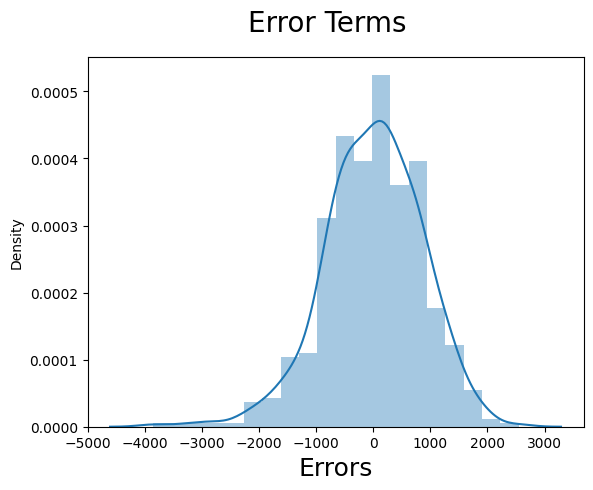

In [75]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

In [76]:
y_test_pred=res3.predict(X_test_sm)

Text(0.5, 0, 'Errors')

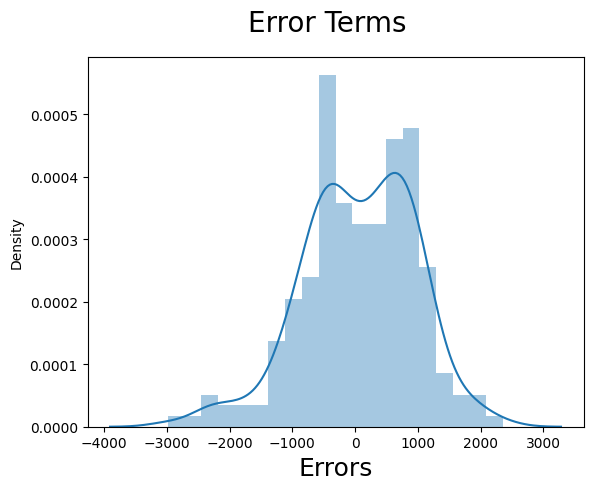

In [77]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

## Model Evaluation

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7738208320903469

In [ ]:
# Quite close to that of the train data should be sufficient for validating the assumptions of Linear regression.